In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='C:\\Users\\HP\\Desktop\\object detection\\54a8e8b51beb3bd3f770b79e56927bd7-2a20064a9d33b893dd95d2567da126d0ecd03e85\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='C:\\Users\\HP\\Desktop\\object detection\\ssd_mobilenet_v3_large_coco_2020_01_14\\frozen_inference_graph.pb'

In [3]:
model= cv2.dnn_DetectionModel(frozen_model,config_file)


In [4]:
classLabels=[]
file_name='names.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
print (classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000025ED86047B0>

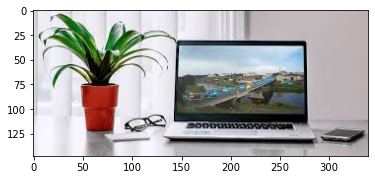

In [10]:
img= cv2.imread('7.jpg')
plt.imshow(img) #bgr image
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))#rgb

In [12]:
ClassIndex,confidence,bbox = model.detect(img,confThreshold=0.6)
print(ClassIndex)

[64 73 47 86]


In [8]:
font_scale = 3
font= cv2.FONT_HERSHEY_PLAIN
for  ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    name=classLabels[ClassInd-1]
    print(name)
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,name,[boxes[0]+10,boxes[1]+40],font, 1 ,(0,255,0),2)
  

    

laptop
refrigerator
banana


IndexError: list index out of range

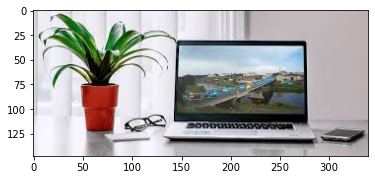

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
cap=cv2.VideoCapture("street.mp4")
#cap=cv2.VideoCapture()

# Check if the video is opeed correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video")
    
font_scale= 3
font= cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame =cap.read()
    
    ClassIndex, confidence,bbox= model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if  (len(ClassIndex)!=0) :
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if  (ClassInd<= 80):
                nam=classLabels[ClassInd-1]
                print(nam)
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,nam,[boxes[0]+10,boxes[1]+40],font, 1 ,(0,255,0),2)
    cv2.imshow('object detection',frame)
    if cv2.waitKey(2) &  0xFF ==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[3 3 3 1 3]
car
car
car
person
car
[3 3 3 3 3 1 1]
car
car
car
car
car
person
person
[3 3 3 3 3 1 1]
car
car
car
car
car
person
person
[3 3 3]
car
car
car
[3 3 3]
car
car
car
[3 3 3]
car
car
car
[3 3 3 3]
car
car
car
car
[3 3 3]
car
car
car
[3 3 3 3 3 1 1 3]
car
car
car
car
car
person
person
car
[3 3 3 3 3 1 1]
car
car
car
car
car
person
person
[3 3 3 3 1 1 1 3]
car
car
car
car
person
person
person
car
[3 3 3 1 3 1 3 1]
car
car
car
person
car
person
car
person
[3 3 3 3]
car
car
car
car
[ 3 13  3  1]
car
parking meter
car
person
[3 1 3 1]
car
person
car
person
[3 3]
car
car
()
()
[13  3  1]
parking meter
car
person
()
[3]
car
[13  3  3]
parking meter
car
car
[ 3  1  3 13]
car
person
car
parking meter
[3 1 3]
car
person
car
[3 3]
car
car
[3 3 1]
car
car
person
[1 3 3]
person
car
car
[3 1 3]
car
person
car
[3 3 3 1 1]
car
car
car
person
person
[3 3 1 1]
car
car
person
person
[1 3 3]
person
car
car
[3 3 1 3]
car
car
person
car
[3 1 3]
car
person
car
[1 3 3]
person
car
car
[3 3 1 1]
car
car

[3 3 3 1 3 3 1 1 3 1 1 2 3 3]
car
car
car
person
car
car
person
person
car
person
person
bicycle
car
car
[3 3 3 3 1 1 3 1 1 2 1 3 4 3 1]
car
car
car
car
person
person
car
person
person
bicycle
person
car
motorbike
car
person
[3 3 3 3 1 3 1 1 1 1 2 3 3 3]
car
car
car
car
person
car
person
person
person
person
bicycle
car
car
car
[3 3 1 3 3 3 1 3 1 1 3 1 3]
car
car
person
car
car
car
person
car
person
person
car
person
car
[3 1 3 3 3 3 3 1 1 3 1 1 3]
car
person
car
car
car
car
car
person
person
car
person
person
car
[3 3 3 1 3 3 1 1 1 1 2 1 3 3]
car
car
car
person
car
car
person
person
person
person
bicycle
person
car
car
[3 1 3 3 3 3 1 1 3 1 1 1 2 1]
car
person
car
car
car
car
person
person
car
person
person
person
bicycle
person
[3 1 3 3 3 3 3 1 1 1 1 1 3 3 2 2]
car
person
car
car
car
car
car
person
person
person
person
person
car
car
bicycle
bicycle
[3 3 3 1 3 3 3 2 1 2 1 3 1 1 1]
car
car
car
person
car
car
car
bicycle
person
bicycle
person
car
person
person
person
[3 3 3 1 3 3 2 3 2 

[3 3 3 1 1 3 1 3 3 1 1 3 3 2 1 1 4 1 3]
car
car
car
person
person
car
person
car
car
person
person
car
car
bicycle
person
person
motorbike
person
car
[3 3 3 1 1 3 1 3 1 3 3 3 1 1 2 4 4 2 1 1 3]
car
car
car
person
person
car
person
car
person
car
car
car
person
person
bicycle
motorbike
motorbike
bicycle
person
person
car
[3 3 3 1 3 3 1 1 3 1 1 3 1 3 1 1 1]
car
car
car
person
car
car
person
person
car
person
person
car
person
car
person
person
person
[3 3 3 3 1 3 3 1 3 3 1 3 1 3 1 1]
car
car
car
car
person
car
car
person
car
car
person
car
person
car
person
person
[3 3 1 3 3 3 3 1 3 3 3 1 1 4 2 3]
car
car
person
car
car
car
car
person
car
car
car
person
person
motorbike
bicycle
car
[3 1 3 3 3 3 1 3 3 1 3 2 3 2 3]
car
person
car
car
car
car
person
car
car
person
car
bicycle
car
bicycle
car
[3 1 3 1 3 3 3 3 1 3 3 3 3]
car
person
car
person
car
car
car
car
person
car
car
car
car
[3 3 1 1 3 3 3 3 1 3 3 3 2 2 3]
car
car
person
person
car
car
car
car
person
car
car
car
bicycle
bicycle
car
[3 1

[3 3 3 1 3 3 1 1 3 3 3 3 3 1 3 1 3]
car
car
car
person
car
car
person
person
car
car
car
car
car
person
car
person
car
[3 3 3 1 3 3 1 3 3 1 3 1 3 1 1 3 1 3 1]
car
car
car
person
car
car
person
car
car
person
car
person
car
person
person
car
person
car
person
[3 3 3 1 3 3 1 2 1 1 3 3 3 3 3 3 1 1 1 3]
car
car
car
person
car
car
person
bicycle
person
person
car
car
car
car
car
car
person
person
person
car
[3 3 1 3 3 3 1 1 2 3 3 3 3 1 1 3 1 3 3]
car
car
person
car
car
car
person
person
bicycle
car
car
car
car
person
person
car
person
car
car
[3 3 3 1 3 3 1 2 1 1 3 3 3 1 3 3 3 2 3]
car
car
car
person
car
car
person
bicycle
person
person
car
car
car
person
car
car
car
bicycle
car
[3 3 3 1 3 1 2 3 1 3 3 3 3 1 3 3 2 1]
car
car
car
person
car
person
bicycle
car
person
car
car
car
car
person
car
car
bicycle
person
[3 3 3 3 1 1 3 2 1 3 3 3 2 1 3 3 4]
car
car
car
car
person
person
car
bicycle
person
car
car
car
bicycle
person
car
car
motorbike
[3 3 3 3 1 1 3 1 3 3 1 3 3 1 3 2 4]
car
car
car
car
pe

car
car
car
person
person
person
person
person
car
person
person
car
car
car
car
person
[3 3 3 3 1 1 1 1 1 1 3 1 3 3 1 3 3]
car
car
car
car
person
person
person
person
person
person
car
person
car
car
person
car
car
[ 3  3  3  3  1  1  1  1  1  3  1  1  3  3 31  3]
car
car
car
car
person
person
person
person
person
car
person
person
car
car
skis
car
[3 3 3 3 1 1 1 1 1 1 1 3 1 3 3 3]
car
car
car
car
person
person
person
person
person
person
person
car
person
car
car
car
[3 3 3 3 1 1 1 1 1 1 1 3 3 3 1 3]
car
car
car
car
person
person
person
person
person
person
person
car
car
car
person
car
[3 3 3 3 1 1 1 1 1 1 1 3 3 3 3]
car
car
car
car
person
person
person
person
person
person
person
car
car
car
car
[3 3 3 3 1 1 1 1 1 3 1 1 3 3 3]
car
car
car
car
person
person
person
person
person
car
person
person
car
car
car
[3 3 3 3 1 1 3 1 1 1 1 1 3 3 3 3 1]
car
car
car
car
person
person
car
person
person
person
person
person
car
car
car
car
person
[3 3 3 3 1 3 1 1 1 3 1 1 1 3 3 3 3 1]
car
car
car


[3 3 3 3 1 3 3 1 3 3 1 3 1 3 3]
car
car
car
car
person
car
car
person
car
car
person
car
person
car
car
[3 3 3 3 1 1 3 3 1 3 3 1 3 3]
car
car
car
car
person
person
car
car
person
car
car
person
car
car
[3 3 3 3 1 1 3 3 1 3 1 3 3 1]
car
car
car
car
person
person
car
car
person
car
person
car
car
person
[3 3 3 1 3 1 3 3 1 1]
car
car
car
person
car
person
car
car
person
person
[3 3 3 1 3 1 3 3 1 3 1 3 3]
car
car
car
person
car
person
car
car
person
car
person
car
car
[3 3 3 1 1 3 3 3 1 3 1 3 4]
car
car
car
person
person
car
car
car
person
car
person
car
motorbike
[3 3 3 1 1 3 3 3 3 3 1 3 1 3 4]
car
car
car
person
person
car
car
car
car
car
person
car
person
car
motorbike
[3 3 3 1 3 1 3 3 3 3 3 1 1]
car
car
car
person
car
person
car
car
car
car
car
person
person
[3 3 3 1 1 3 3 3 3 1 4 3 3 3 1 1]
car
car
car
person
person
car
car
car
car
person
motorbike
car
car
car
person
person
[3 1 3 3 4 1 3 3 3 1 1 3 3 3]
car
person
car
car
motorbike
person
car
car
car
person
person
car
car
car
[3 3 3 1

[3 1 3 3 3 3 3 3 1 3 3 3 3 3 1 1 1 3 1]
car
person
car
car
car
car
car
car
person
car
car
car
car
car
person
person
person
car
person
[3 3 3 3 3 1 3 3 3 1 3 3 3 3 1 1 1 3 1]
car
car
car
car
car
person
car
car
car
person
car
car
car
car
person
person
person
car
person
[3 3 3 3 3 1 1 1 3 1 3 3 3 3 3 3 3 1]
car
car
car
car
car
person
person
person
car
person
car
car
car
car
car
car
car
person
[3 3 3 3 3 1 1 3 3 1 1 3 1 3 3 3 1 3 2 1]
car
car
car
car
car
person
person
car
car
person
person
car
person
car
car
car
person
car
bicycle
person
[3 3 3 1 1 3 1 3 3 3 1 1 3 2 3 3 2 3]
car
car
car
person
person
car
person
car
car
car
person
person
car
bicycle
car
car
bicycle
car
[3 3 3 1 1 3 3 3 1 3 1 1 1 3 3 3 1]
car
car
car
person
person
car
car
car
person
car
person
person
person
car
car
car
person
[3 3 3 1 1 3 1 3 1 3 3 1 1 3 3 1 3 2]
car
car
car
person
person
car
person
car
person
car
car
person
person
car
car
person
car
bicycle
[3 3 3 1 1 3 1 1 3 3 1 1 3 1 3 1]
car
car
car
person
person
car
per

[3 3 1 1 3 2 4 1 3 3 3 3 1 4 3]
car
car
person
person
car
bicycle
motorbike
person
car
car
car
car
person
motorbike
car
[3 3 1 3 1 2 1 1 3 3 3 3 3 4 1]
car
car
person
car
person
bicycle
person
person
car
car
car
car
car
motorbike
person
[3 3 1 2 3 1 3 4 3 1 4 3 1 3 3 3 3]
car
car
person
bicycle
car
person
car
motorbike
car
person
motorbike
car
person
car
car
car
car
[3 3 1 3 4 2 3 4 3 1 3 3 3 1 1]
car
car
person
car
motorbike
bicycle
car
motorbike
car
person
car
car
car
person
person
[3 3 1 3 4 3 3 1 1 3 1 3 3]
car
car
person
car
motorbike
car
car
person
person
car
person
car
car
[3 3 4 3 1 3 4 3 4 1 1 3 3 1]
car
car
motorbike
car
person
car
motorbike
car
motorbike
person
person
car
car
person
[3 3 3 3 4 3 1 1 4 1 3 3 1 4 1 3 2]
car
car
car
car
motorbike
car
person
person
motorbike
person
car
car
person
motorbike
person
car
bicycle
[3 3 3 4 3 1 3 1 1 4 4 3]
car
car
car
motorbike
car
person
car
person
person
motorbike
motorbike
car
[3 3 3 3 1 1 2 3 1 3 4 1 3]
car
car
car
car
person
pers

[3 3 3 3 3 3 1 3 3 2 3 3 4 3]
car
car
car
car
car
car
person
car
car
bicycle
car
car
motorbike
car
[3 3 3 3 4 3 3 3 3 3 3 3 2 3 4 3]
car
car
car
car
motorbike
car
car
car
car
car
car
car
bicycle
car
motorbike
car
[3 3 3 3 3 3 3 3 4 3 3 3 2 1]
car
car
car
car
car
car
car
car
motorbike
car
car
car
bicycle
person
[3 3 3 3 3 3 3 3 3 1 3 3 1 3 4 3]
car
car
car
car
car
car
car
car
car
person
car
car
person
car
motorbike
car
[3 3 3 1 3 4 3 3 3 1 3 1 3 1 3 3]
car
car
car
person
car
motorbike
car
car
car
person
car
person
car
person
car
car
[3 3 3 4 1 3 4 1 3 1 3 3 1 3 1 3]
car
car
car
motorbike
person
car
motorbike
person
car
person
car
car
person
car
person
car
[3 3 3 4 1 3 4 1 3 3 1 1 1 3 3 3 3 1 4 1]
car
car
car
motorbike
person
car
motorbike
person
car
car
person
person
person
car
car
car
car
person
motorbike
person
[3 3 3 3 4 4 3 3 3 4 3 3 3 1 1]
car
car
car
car
motorbike
motorbike
car
car
car
motorbike
car
car
car
person
person
[3 3 3 3 4 3 3 3 3 1 3 4 3 1 4]
car
car
car
car
motorbike
ca

[3 3 3 3 1 4 3 1 3 3 1 1 3 1 3 3 1 3]
car
car
car
car
person
motorbike
car
person
car
car
person
person
car
person
car
car
person
car
[3 3 3 3 1 3 1 4 3 1 1 3 3 3 1 1 3]
car
car
car
car
person
car
person
motorbike
car
person
person
car
car
car
person
person
car
[3 3 3 3 3 1 1 4 3 3 3 3 1 4 1 1 3]
car
car
car
car
car
person
person
motorbike
car
car
car
car
person
motorbike
person
person
car
[3 3 3 3 3 1 1 3 3 3 3 4 1 3 3 1]
car
car
car
car
car
person
person
car
car
car
car
motorbike
person
car
car
person
[3 3 3 3 3 1 1 3 3 3 3 3 1 3 1 4 1 1 3]
car
car
car
car
car
person
person
car
car
car
car
car
person
car
person
motorbike
person
person
car
[3 3 3 3 1 3 1 3 3 3 1 4 3 3 1 1 3]
car
car
car
car
person
car
person
car
car
car
person
motorbike
car
car
person
person
car
[3 3 3 1 3 3 3 3 1 4 1 3 1 3 3 1 1 3]
car
car
car
person
car
car
car
car
person
motorbike
person
car
person
car
car
person
person
car
[3 3 3 1 3 3 1 3 4 1 3 3 3 3 1 1 1 3 1 3 4]
car
car
car
person
car
car
person
car
motorbike


[3 2 3 3 3 1 3 3 3 1 3 1 1 2 1 4 3]
car
bicycle
car
car
car
person
car
car
car
person
car
person
person
bicycle
person
motorbike
car
[3 3 3 2 1 3 3 3 3 1 3 1 3 1]
car
car
car
bicycle
person
car
car
car
car
person
car
person
car
person
[3 3 3 3 3 1 3 2 1 3 1 3 1 2 3 4 3]
car
car
car
car
car
person
car
bicycle
person
car
person
car
person
bicycle
car
motorbike
car
[3 3 3 3 3 3 3 1 1 3 4 3 1]
car
car
car
car
car
car
car
person
person
car
motorbike
car
person
[3 3 3 3 3 3 3 1 4 1 1 1 3 3 1]
car
car
car
car
car
car
car
person
motorbike
person
person
person
car
car
person
[3 3 3 3 3 3 3 3 1 4 3 1 1 3 1]
car
car
car
car
car
car
car
car
person
motorbike
car
person
person
car
person
[3 3 3 3 3 3 3 1 3 4 3 3 1 1]
car
car
car
car
car
car
car
person
car
motorbike
car
car
person
person
[3 3 3 3 3 3 4 3 1 1 3 3 1 1 3]
car
car
car
car
car
car
motorbike
car
person
person
car
car
person
person
car
[3 3 3 3 1 3 1 3 4 3 1 3 1 3 3]
car
car
car
car
person
car
person
car
motorbike
car
person
car
person
car


[3 3 3 4 3 1 3 1 3 3 1 3 1 3]
car
car
car
motorbike
car
person
car
person
car
car
person
car
person
car
[3 3 3 4 3 1 3 1 3 3 3 3 1 1]
car
car
car
motorbike
car
person
car
person
car
car
car
car
person
person
[3 3 4 3 3 1 3 3 1 3 1 3 3 3]
car
car
motorbike
car
car
person
car
car
person
car
person
car
car
car
[3 3 3 4 1 3 3 3 1 1 3 3 3 3 1 1]
car
car
car
motorbike
person
car
car
car
person
person
car
car
car
car
person
person
[3 3 1 3 3 4 3 1 3 1 3 3 3 1 3]
car
car
person
car
car
motorbike
car
person
car
person
car
car
car
person
car
[3 3 3 1 3 3 4 1 1 3 1 3 1 3 1 3 3]
car
car
car
person
car
car
motorbike
person
person
car
person
car
person
car
person
car
car
[3 3 3 1 3 3 4 3 1 1 1 3 3 1 1 3]
car
car
car
person
car
car
motorbike
car
person
person
person
car
car
person
person
car
[3 3 3 4 1 3 3 1 1 1 3 3 8 3]
car
car
car
motorbike
person
car
car
person
person
person
car
car
truck
car
[3 3 3 1 3 4 3 1 1 1 3 3 1 3 8 2]
car
car
car
person
car
motorbike
car
person
person
person
car
car
person

[3 3 3 3 3 1 3 3 1 3 1 1 1 1 3 3 4]
car
car
car
car
car
person
car
car
person
car
person
person
person
person
car
car
motorbike
[3 3 3 3 1 3 3 3 3 1 1 3 1 1 3 1]
car
car
car
car
person
car
car
car
car
person
person
car
person
person
car
person
[3 3 3 3 1 3 3 3 3 1 3 1 4 4 1 3]
car
car
car
car
person
car
car
car
car
person
car
person
motorbike
motorbike
person
car
[3 3 3 3 1 3 3 3 3 3 1 1 1 1 1 1]
car
car
car
car
person
car
car
car
car
car
person
person
person
person
person
person
[3 3 3 3 1 3 3 4 1 3 3 3 1 1 4 1 4 1]
car
car
car
car
person
car
car
motorbike
person
car
car
car
person
person
motorbike
person
motorbike
person
[3 3 3 3 1 3 4 3 3 4 1 3 1 3 1 4 1 1]
car
car
car
car
person
car
motorbike
car
car
motorbike
person
car
person
car
person
motorbike
person
person
[3 3 3 3 3 4 1 3 4 1 3 1 1 4 3 1 3 1]
car
car
car
car
car
motorbike
person
car
motorbike
person
car
person
person
motorbike
car
person
car
person
[3 3 3 3 3 4 3 1 1 3 4 1 1 3 1 3 4 1]
car
car
car
car
car
motorbike
car
perso

[3 3 3 3 3 3 3 1 1 3 1 1 3 1 3 1 1 1]
car
car
car
car
car
car
car
person
person
car
person
person
car
person
car
person
person
person
[3 3 3 3 3 3 1 3 1 3 1 4 1 3 1 3 2 1 1 1]
car
car
car
car
car
car
person
car
person
car
person
motorbike
person
car
person
car
bicycle
person
person
person
[3 3 3 3 3 3 1 3 1 3 3 1 1 4 1 3 3 1 1]
car
car
car
car
car
car
person
car
person
car
car
person
person
motorbike
person
car
car
person
person
[3 3 3 3 3 3 3 1 3 1 3 1 1 3 3 1 1 4 1]
car
car
car
car
car
car
car
person
car
person
car
person
person
car
car
person
person
motorbike
person
[3 3 3 3 3 2 3 3 1 3 4 1 3 3 1 1 3 1]
car
car
car
car
car
bicycle
car
car
person
car
motorbike
person
car
car
person
person
car
person
[3 3 3 3 3 3 2 3 3 1 3 4 3 1 1 1 1 3]
car
car
car
car
car
car
bicycle
car
car
person
car
motorbike
car
person
person
person
person
car
[3 3 3 3 3 3 3 1 2 3 1 3 1 3 1 4 3 1 1]
car
car
car
car
car
car
car
person
bicycle
car
person
car
person
car
person
motorbike
car
person
person
[3 3 3 3 3

[3 3 3 3 3 3 1 4 3 1 3 1 1 3 1 3 1 3 3]
car
car
car
car
car
car
person
motorbike
car
person
car
person
person
car
person
car
person
car
car
[3 3 3 3 3 1 3 3 1 1 3 3 3 3 1]
car
car
car
car
car
person
car
car
person
person
car
car
car
car
person
[3 3 3 3 3 3 1 3 1 1 3 3 3 3 1 3]
car
car
car
car
car
car
person
car
person
person
car
car
car
car
person
car
[3 3 3 3 3 3 3 3 1 1 1 3 3 1]
car
car
car
car
car
car
car
car
person
person
person
car
car
person
[3 3 3 3 3 3 1 3 1 3 1 3 1 3]
car
car
car
car
car
car
person
car
person
car
person
car
person
car
[3 3 3 3 3 3 1 3 3 1 1 3 1 3]
car
car
car
car
car
car
person
car
car
person
person
car
person
car
[3 3 3 3 3 3 3 1 3 3 1 1 3 1]
car
car
car
car
car
car
car
person
car
car
person
person
car
person
[3 3 3 3 3 3 1 3 3 1 3 1]
car
car
car
car
car
car
person
car
car
person
car
person
[3 3 3 3 1 3 3 1 3 3 3 1]
car
car
car
car
person
car
car
person
car
car
car
person
[3 3 3 3 3 3 3 1 3 1 3 3 1 3]
car
car
car
car
car
car
car
person
car
person
car
car
pers

[3 3 1 4 3 3 4 3 3 3 2 3 1 1]
car
car
person
motorbike
car
car
motorbike
car
car
car
bicycle
car
person
person
[3 1 4 3 3 4 3 3 3 3 3 1 1]
car
person
motorbike
car
car
motorbike
car
car
car
car
car
person
person
[3 4 3 4 3 1 3 3 3 3 3 3 2 1]
car
motorbike
car
motorbike
car
person
car
car
car
car
car
car
bicycle
person
[3 4 4 3 1 3 3 3 3 1 3 3 3 1 4]
car
motorbike
motorbike
car
person
car
car
car
car
person
car
car
car
person
motorbike
[3 4 4 1 3 3 1 3 3 3 3 3]
car
motorbike
motorbike
person
car
car
person
car
car
car
car
car
[3 1 3 3 4 1 4 3 3 3 3 3 3]
car
person
car
car
motorbike
person
motorbike
car
car
car
car
car
car
[3 3 3 1 4 1 4 3 3 3 3 3 3]
car
car
car
person
motorbike
person
motorbike
car
car
car
car
car
car
[3 3 3 1 4 4 1 3 3 3 3 3 3 3 3]
car
car
car
person
motorbike
motorbike
person
car
car
car
car
car
car
car
car
[3 3 3 3 3 1 1 3 3 3 4 1 3 3 3 3]
car
car
car
car
car
person
person
car
car
car
motorbike
person
car
car
car
car
[3 3 3 1 3 3 4 3 1 4 3 3 1 3 3 3 4]
car
car
car
pe

[3 4 3 3 3 3 1 3 3 3 4 3 2 4 3 1 4 2 1]
car
motorbike
car
car
car
car
person
car
car
car
motorbike
car
bicycle
motorbike
car
person
motorbike
bicycle
person
[3 4 3 3 4 3 2 3 4 1 3 3 3 1 2 3 1 1 4]
car
motorbike
car
car
motorbike
car
bicycle
car
motorbike
person
car
car
car
person
bicycle
car
person
person
motorbike
[3 4 3 3 1 4 1 3 3 4 3 3 3 3 3 1 2 2 1 1 4]
car
motorbike
car
car
person
motorbike
person
car
car
motorbike
car
car
car
car
car
person
bicycle
bicycle
person
person
motorbike
[3 4 3 4 3 1 3 2 3 4 3 3 1 3 3 1 4 3 1 1]
car
motorbike
car
motorbike
car
person
car
bicycle
car
motorbike
car
car
person
car
car
person
motorbike
car
person
person
[3 4 4 3 3 1 3 4 3 4 3 2 3 3 1 3 2 1 2 1]
car
motorbike
motorbike
car
car
person
car
motorbike
car
motorbike
car
bicycle
car
car
person
car
bicycle
person
bicycle
person
[3 3 4 4 3 4 1 3 3 1 3 3 4 3 2 1 3 1 3]
car
car
motorbike
motorbike
car
motorbike
person
car
car
person
car
car
motorbike
car
bicycle
person
car
person
car
[3 3 4 4 3 4 1 1 

[3 4 1 3 3 1 4 1 1 4 1 3 3 3 4 4 2 8 3 4 3 3]
car
motorbike
person
car
car
person
motorbike
person
person
motorbike
person
car
car
car
motorbike
motorbike
bicycle
truck
car
motorbike
car
car
[3 4 1 3 3 4 1 1 1 4 3 3 1 1 8 4 3 2 4 3]
car
motorbike
person
car
car
motorbike
person
person
person
motorbike
car
car
person
person
truck
motorbike
car
bicycle
motorbike
car
[3 4 1 3 4 1 3 4 1 4 4 1 3 1 3 4 1 3 2 3]
car
motorbike
person
car
motorbike
person
car
motorbike
person
motorbike
motorbike
person
car
person
car
motorbike
person
car
bicycle
car
[3 4 1 3 4 1 3 1 3 1 4 3 4 4 1 4 4 3 3]
car
motorbike
person
car
motorbike
person
car
person
car
person
motorbike
car
motorbike
motorbike
person
motorbike
motorbike
car
car
[3 1 4 4 3 3 1 4 3 4 4 3 1 4 1 1 4 4 3]
car
person
motorbike
motorbike
car
car
person
motorbike
car
motorbike
motorbike
car
person
motorbike
person
person
motorbike
motorbike
car
[3 1 4 4 3 3 4 1 3 4 4 4 1 3 1 1 4 1 3]
car
person
motorbike
motorbike
car
car
motorbike
person
car
m

[3 4 3 3 3 4 3 3 4 1 3 1 1 3 1 3]
car
motorbike
car
car
car
motorbike
car
car
motorbike
person
car
person
person
car
person
car
[3 4 3 3 3 1 4 1 4 3 3 4 3 1 1 3 1 1]
car
motorbike
car
car
car
person
motorbike
person
motorbike
car
car
motorbike
car
person
person
car
person
person
[3 4 3 3 3 4 1 1 1 3 3 4 3 1 1 3 4]
car
motorbike
car
car
car
motorbike
person
person
person
car
car
motorbike
car
person
person
car
motorbike
[3 3 4 3 3 1 4 1 1 3 3 4 4 3 3 1 1]
car
car
motorbike
car
car
person
motorbike
person
person
car
car
motorbike
motorbike
car
car
person
person
[3 3 1 3 3 4 4 1 3 1 3 3 1 1]
car
car
person
car
car
motorbike
motorbike
person
car
person
car
car
person
person
[3 1 3 3 3 4 1 1 3 3 1 4 4 1 4 3]
car
person
car
car
car
motorbike
person
person
car
car
person
motorbike
motorbike
person
motorbike
car
[3 1 3 3 3 4 4 1 3 1 1 4 3 3 4]
car
person
car
car
car
motorbike
motorbike
person
car
person
person
motorbike
car
car
motorbike
[3 1 4 3 3 3 4 1 3 3 3 1 3 4 1]
car
person
motorbike
car

KeyboardInterrupt: 

In [ ]:
while(cap.isOpened()):
    stime= time.time()
    ret, frame = cap.read()
    results = tfnet.return_predict(frame)
    if ret:
        for color, result in zip(colors, results):
            tl = (result['topleft']['x'], result['topleft']['y'])
            br = (result['bottomright']['x'], result['bottomright']['y'])
            label = result['label']
            frame= cv2.rectangle(frame, tl, br, color, 7)
            frame= cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_TRIPLEX, 1, (0,0,0), 2)
        cv2.imshow('frame', frame)
        print('FPS {:1f}'.format(1/(time.time() -stime)))
        if cv2.waitKey(1)  & 0xFF == ord('q'):
            break
    else:
        break
          
cap.release()
cv2.destroyAllWindows()